In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


data=pd.read_csv(r"C:\Users\salon\Downloads\emails.csv\emails.csv")
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
X=data.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [9]:
y=data.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

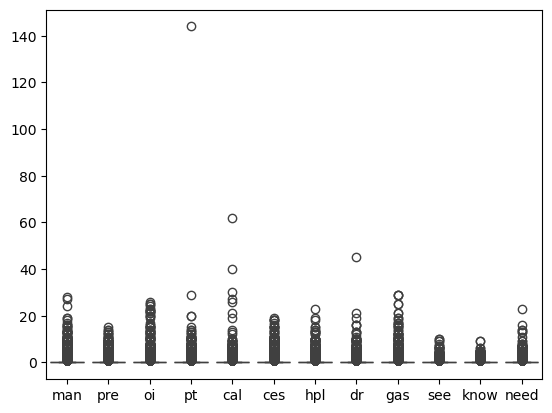

In [10]:
data_numeric=data.select_dtypes(include=['int64','float64'])
Q1=data_numeric.quantile(0.25)
Q3=data_numeric.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outlier_mask=((data_numeric < lower)|(data_numeric>upper))
outlier_counts=outlier_mask.sum().sort_values(ascending=False)
topN=12
top_feature=outlier_counts.head(topN).index.tolist()
sns.boxplot(data=data_numeric[top_feature])
plt.show()


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
svc=SVC(C=10,kernel='rbf')
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

print("SVM ACCURACY:",accuracy_score(y_test,svc_pred))
print("SVM CONFUSION MATRIX:",confusion_matrix(y_test,svc_pred))
print("SVM CLASSIFICATION REPORT:",classification_report(y_test,svc_pred))


SVM ACCURACY: 0.9126063418406806
SVM CONFUSION MATRIX: [[888  25]
 [ 88 292]]
SVM CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.91      0.97      0.94       913
           1       0.92      0.77      0.84       380

    accuracy                           0.91      1293
   macro avg       0.92      0.87      0.89      1293
weighted avg       0.91      0.91      0.91      1293



In [12]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)

print("KNN ACCURACY:",accuracy_score(y_test,knn_pred))
print("KNN CONFUSION MATRIX:",confusion_matrix(y_test,knn_pred))
print("KNN CLASSIFICATION REPORT:",classification_report(y_test,knn_pred))


KNN ACCURACY: 0.8662026295436969
KNN CONFUSION MATRIX: [[799 114]
 [ 59 321]]
KNN CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.93      0.88      0.90       913
           1       0.74      0.84      0.79       380

    accuracy                           0.87      1293
   macro avg       0.83      0.86      0.85      1293
weighted avg       0.87      0.87      0.87      1293



In [13]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)
ks=[1,3,5]
results={}
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train_s, y_train)              # X_train_s must be scaled features
    y_pred = knn.predict(X_test_s)          # X_test_s must be scaled features

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)

    results[k] = acc

    print(f"\nK = {k}:")
    print(f"  Accuracy = {acc:.4f}")
    print("  Confusion Matrix:")
    print(cm)
    print("  Classification Report:")
    print(report)


K = 1:
  Accuracy = 0.9026
  Confusion Matrix:
[[819  94]
 [ 32 348]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       913
           1       0.79      0.92      0.85       380

    accuracy                           0.90      1293
   macro avg       0.87      0.91      0.89      1293
weighted avg       0.91      0.90      0.90      1293


K = 3:
  Accuracy = 0.8639
  Confusion Matrix:
[[758 155]
 [ 21 359]]
  Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       913
           1       0.70      0.94      0.80       380

    accuracy                           0.86      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.89      0.86      0.87      1293


K = 5:
  Accuracy = 0.8345
  Confusion Matrix:
[[716 197]
 [ 17 363]]
  Classification Report:
              precision    recall  f1-score   support

   